# E15 - MLP

# Exercise 15.1

 Train a Neural Network with two hidden layers of size 4 each. Include the mathematical model that is used.

**Matemáticamente**

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$

$$z^{[2](i)} =  W^{[2]} z^{[1](i)} + b^{[2]}\tag{3}$$ 
$$a^{[2](i)} = \tanh(z^{[2] (i)})\tag{4}$$

$$z^{[3](i)} = W^{[3]} a^{[1] (i)} + b^{[3]}\tag{5}$$
$$\hat{y}^{(i)} = a^{[3] (i)} = \sigma(z^{ [3] (i)})\tag{6}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[3](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{7}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def layer_sizes(X, Y, hidden_1, hidden_2):
    n_x = X.shape[0] # size of input layer
    n_h1 = hidden_1
    n_h2 = hidden_2
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h1, n_h2, n_y)

In [3]:
# Solved Exercise: initialize_parameters

def initialize_parameters(n_x, n_h1, n_h2, n_y):    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h1,n_x) * 0.01
    b1 = np.zeros(shape=(n_h1,1))
    W2 = np.random.randn(n_h2, n_h1)
    b2 = np.zeros(shape=(n_h2,1))
    W3 = np.random.randn(n_y,n_h2) * 0.01
    b3 = np.zeros(shape=(n_y,1))
    
    assert (W1.shape == (n_h1, n_x))
    assert (b1.shape == (n_h1, 1))
    assert (W2.shape == (n_h2, n_h1))
    assert (b2.shape == (n_h2, 1))   
    assert (W3.shape == (n_y, n_h2))
    assert (b3.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,                
                  "W3": W3,
                  "b3": b3}

    return parameters

In [4]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]   
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = np.tanh(Z2)    
    Z3 = np.dot(W3,A2)+b3
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z2,
             "A3": Z3}
    
    return A3, cache

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [5]:
def compute_cost(A3, Y, parameters):
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(Y,np.log(A3)) + np.multiply(1-Y,np.log(1-A3))
    cost = -1/m * np.sum(logprobs)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 

    assert(isinstance(cost, float))
    
    return cost

In [6]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
       
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ3 = A3 - Y
    dW3 = 1/m * np.dot(dZ3,A2.T)
    db3 = 1/m*np.sum(dZ3,axis=1,keepdims=True)    
    dZ2 = np.dot(W3.T,dZ3) * (1 - np.power(A2,2))
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m* np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h1, n_h2, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y, n_h1, n_h2)[0]
    n_y = layer_sizes(X, Y, n_h1, n_h2)[3]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x,n_h1,n_h2,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3,Y,parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [9]:
def predict(parameters, X):

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A3, cache = forward_propagation(X,parameters)
    predictions = A3 > 0.5
    
    return predictions

# Exercise 15.2

Test your MLP building blocks in real data

Use the information of the problem in the notebook: 14-Test our MLP building blocks in real data

In [10]:
from sklearn.datasets.samples_generator import make_circles

x_train, y_train = make_circles(n_samples=1000, noise= 0.05, random_state=3)

C:\Users\DALEON\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(15,10))
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=80, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.724077
Cost after iteration 2000: 0.724076
Cost after iteration 3000: 0.724076
Cost after iteration 4000: 0.724075
Cost after iteration 5000: 0.724025
Cost after iteration 6000: 0.716174
Cost after iteration 7000: 0.666032
Cost after iteration 8000: 0.654223
Cost after iteration 9000: 0.616271
Cost after iteration 10000: 0.568007
Cost after iteration 11000: 0.555650
Cost after iteration 12000: 0.549532
Cost after iteration 13000: 0.545587
Cost after iteration 14000: 0.542881
Cost after iteration 15000: 0.541044
Cost after iteration 16000: 0.539598
Cost after iteration 17000: 0.538375
Cost after iteration 18000: 0.537334
Cost after iteration 19000: 0.536464


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

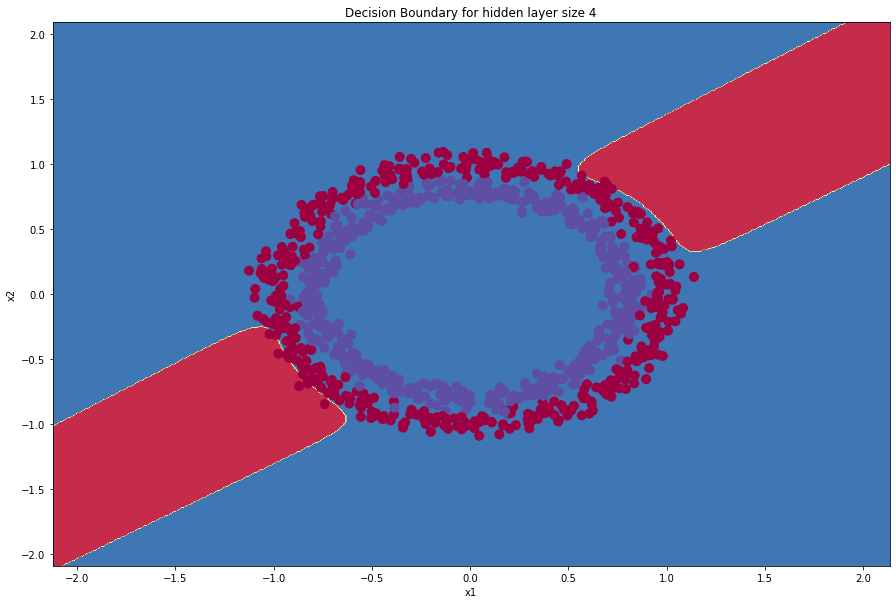

In [12]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(x_train.T, np.array([y_train.T]), n_h1 = 4, n_h2 = 4, num_iterations = 20000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), x_train.T, np.array([y_train.T]))
plt.title("Decision Boundary for hidden layer size " + str(4))

In [13]:
# Print accuracy
predictions = predict(parameters, x_train.T)
print ('Accuracy: %d' % float((np.dot( np.array([y_train.T]),predictions.T) + np.dot(1- np.array([y_train.T]),1-predictions.T))/float( np.array([y_train.T]).size)*100) + '%')

Accuracy: 50%
